# Data Augmentation

Data augmentation occurs when you create new data base on modifications of your existing data. In this case, our data will be image Data augmentation on images would include transformations like:  
  

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc, ndimage
import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation
%matplotlib inline

In [21]:

# plots images with labels 
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2==0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [22]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
                         height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
                         channel_shift_range=10., horizontal_flip=True)

In [23]:

image_path = 'cats-and-dogs/train/dog/dog.8864.jpg'

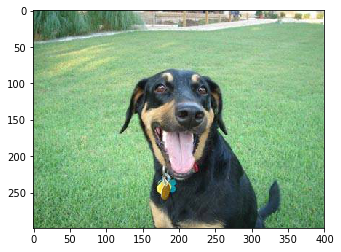

In [24]:
image = np.expand_dims(ndimage.imread(image_path),0)
plt.imshow(image[0])

In [25]:
aug_iter = gen.flow(image)

In [26]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

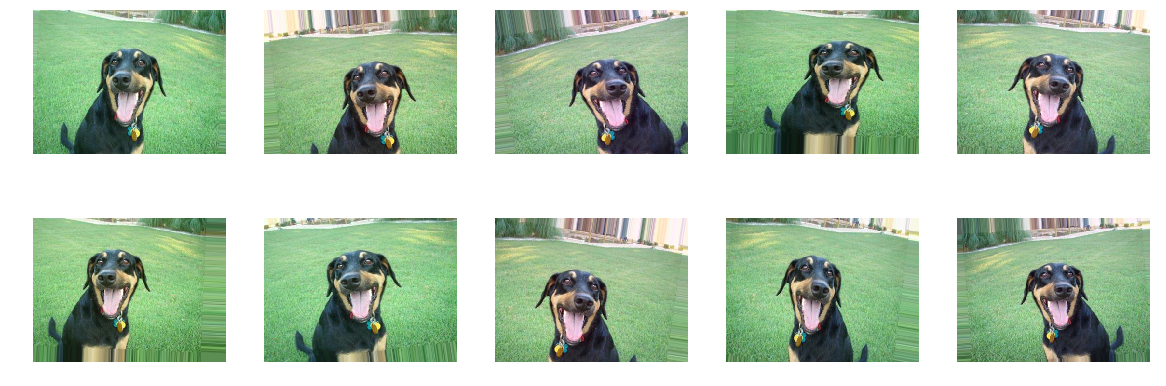

In [27]:
plots(aug_images, figsize=(20,7), rows=2)

In [31]:
model = Sequential([
    Dense(4, input_shape=(1,), activation='relu', use_bias=True, bias_initializer='zeros'),
    Dense(2, activation='softmax')
])
model.get_weights()

[array([[ 0.08605826, -1.0771601 , -1.0371228 , -0.5834492 ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.19657683,  0.82580876],
        [ 0.3252623 ,  0.06504846],
        [-0.05297232,  0.8327038 ],
        [ 0.07078362,  0.29571605]], dtype=float32),
 array([0., 0.], dtype=float32)]

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________
